# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

# Observations and Insights

* Based on the random data with 500 + cities, the result shows that there is the temperature reaches the highest point between latitudes 0 and 20. The temperature starts to fall when latitude increases.

* For the Northern Hemisphere, r-squared is 77.93 % indicate variables between max temp and latitude which can be considered highly correlated and stronger negative relationship.

* For the Southern Hemisphere, r-squared is 47.23 % lower than the midpoint that is not a stronger fit.

* With random data, there are no cities that have humidity greater than 100%.


In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [9]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

626

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [10]:
#Set url for API

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
response = requests.get(query_url + city).json()
response


{'coord': {'lon': -159.775, 'lat': -21.2078},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 26,
  'feels_like': 26,
  'temp_min': 26,
  'temp_max': 26,
  'pressure': 1014,
  'humidity': 89},
 'visibility': 10000,
 'wind': {'speed': 0.51, 'deg': 190},
 'clouds': {'all': 99},
 'dt': 1619680332,
 'sys': {'type': 1,
  'id': 7271,
  'country': 'CK',
  'sunrise': 1619628930,
  'sunset': 1619669837},
 'timezone': -36000,
 'id': 4035715,
 'name': 'Avarua',
 'cod': 200}

In [11]:
# Set empty lists

city_list = []
lat_list = []
lng_list = []
max_temp = []
humidity = []
cloudlness = []
wind_speed = []
country = []
date = []

#Loop through each citiy
print(f'Beginning Data Retrieval')
print('---------------------------')

for index, city in enumerate (cities, start =1):
    
    try:
        response = requests.get(query_url + city).json()
        city_list.append(response['name'])                         
        lat_list.append(response['coord']['lat'])
        lng_list.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudlness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        x = len(cities)                     
        print(f'Processing Record:{index}  | {city}')
        
    except (KeyError):
        print(f'City not found. Skipping...')
       
    
print('---------------------------')
print(f'Data Retrieval Complete ')
print('---------------------------')


Beginning Data Retrieval
---------------------------
Processing Record:1  | ushuaia
Processing Record:2  | cape town
Processing Record:3  | jamestown
Processing Record:4  | cabo san lucas
Processing Record:5  | coahuayana
Processing Record:6  | puerto ayora
Processing Record:7  | constitucion
Processing Record:8  | santo domingo
Processing Record:9  | kruisfontein
Processing Record:10  | bluff
Processing Record:11  | avarua
Processing Record:12  | port augusta
Processing Record:13  | ambulu
Processing Record:14  | castro
Processing Record:15  | punta arenas
City not found. Skipping...
Processing Record:17  | lompoc
Processing Record:18  | hermanus
Processing Record:19  | rikitea
Processing Record:20  | maragogi
Processing Record:21  | vilyuysk
Processing Record:22  | lebu
Processing Record:23  | sambava
Processing Record:24  | tuktoyaktuk
City not found. Skipping...
Processing Record:26  | vaini
Processing Record:27  | naze
Processing Record:28  | chicama
Processing Record:29  | kyra
P

Processing Record:245  | ondjiva
Processing Record:246  | puerto escondido
Processing Record:247  | ust-ilimsk
Processing Record:248  | myitkyina
Processing Record:249  | beyneu
Processing Record:250  | doka
Processing Record:251  | pangody
Processing Record:252  | gualaquiza
Processing Record:253  | nago
Processing Record:254  | katobu
Processing Record:255  | pacific grove
Processing Record:256  | champerico
Processing Record:257  | port hedland
Processing Record:258  | khandbari
Processing Record:259  | mizdah
City not found. Skipping...
Processing Record:261  | leningradskiy
Processing Record:262  | ocean city
Processing Record:263  | coari
Processing Record:264  | ulladulla
City not found. Skipping...
Processing Record:266  | tommot
City not found. Skipping...
Processing Record:268  | fukue
Processing Record:269  | xalpatlahuac
Processing Record:270  | chelno-vershiny
Processing Record:271  | edd
Processing Record:272  | ahipara
Processing Record:273  | pangai
Processing Record:27

Processing Record:490  | areosa
Processing Record:491  | kalemie
Processing Record:492  | el vendrell
Processing Record:493  | namatanai
Processing Record:494  | ati
Processing Record:495  | campoverde
City not found. Skipping...
Processing Record:497  | tha chang
Processing Record:498  | wagar
Processing Record:499  | linxia
Processing Record:500  | yumen
Processing Record:501  | dubbo
Processing Record:502  | ust-kut
City not found. Skipping...
City not found. Skipping...
Processing Record:505  | elizabeth city
Processing Record:506  | bereda
Processing Record:507  | pacasmayo
Processing Record:508  | dunedin
Processing Record:509  | minot
Processing Record:510  | lamar
Processing Record:511  | ekuvukeni
Processing Record:512  | nieuwpoort
City not found. Skipping...
Processing Record:514  | makakilo city
Processing Record:515  | mpanda
Processing Record:516  | cody
Processing Record:517  | aljezur
Processing Record:518  | baherden
Processing Record:519  | gulabpura
Processing Record

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [35]:
#Create DataFrame

weather_df = pd.DataFrame({'City': city_list,'Lat': lat_list,'Lng': lng_list,'Max Temp': max_temp,'Humidity': humidity,'Cloudlness': cloudlness,'Wind Speed': wind_speed,'Country': country,'Date': date})

weather_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudlness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,3.00,75,40,10.29,AR,1619680342
1,Cape Town,-33.9258,18.4232,14.44,88,75,6.17,ZA,1619680159
2,Jamestown,42.0970,-79.2353,16.00,88,90,2.06,US,1619680112
3,Cabo San Lucas,22.8909,-109.9124,20.00,76,0,0.89,MX,1619680196
4,Coahuayana Viejo,18.7333,-103.6833,22.81,88,99,0.15,MX,1619680343


In [13]:
# output city data 

weather_df.to_csv('output_data/cities.csv', index = False)

In [14]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudlness,Wind Speed,Date
count,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,5.750000e+02
mean,19.877471,20.329234,16.487461,70.966957,57.535652,3.204539,1.619680e+09
std,33.756698,92.117851,10.766012,23.285921,39.237751,2.135367,9.145204e+01
min,-54.800000,-179.166700,-9.270000,1.000000,0.000000,0.100000,1.619680e+09
25%,-7.891650,-60.085400,8.045000,60.000000,19.500000,1.540000,1.619680e+09
50%,24.466700,25.783300,17.820000,75.000000,75.000000,2.780000,1.619680e+09
75%,48.528950,101.062950,24.605000,89.000000,99.000000,4.140000,1.619681e+09
max,78.218600,178.416700,41.100000,100.000000,100.000000,12.550000,1.619681e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [15]:
humidity_check = weather_df.loc[weather_df['Humidity'] > 100]['Humidity'].count()
    
print('There are cities that have humidity greater than 100%:',humidity_check)

There are cities that have humidity greater than 100%: 0


In [16]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

* The temperature reaches the highest point between latitudes 0 and 20
* Temperature starts fall when latitude increases

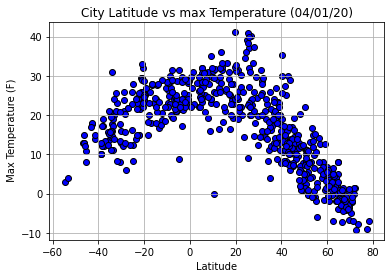

In [17]:
#Build a scatter plot 

fig, ax = plt.subplots(figsize=(6, 4))
plt.scatter(weather_df['Lat'], weather_df['Max Temp'], marker = 'o', color = 'blue', edgecolor='black')


# Incorporate the other graph properties

plt.title("City Latitude vs max Temperature (04/01/20)")
plt.ylabel(" Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the image as .pngs

plt.savefig('output_data/latitude vs temperature.png')

# Show plot
plt.show()




## Latitude vs. Humidity Plot

* The relationship between latitude and humidity across the entire range of the variable plotted. 
* There is no obvious pattern to make an assumption between the variables. 

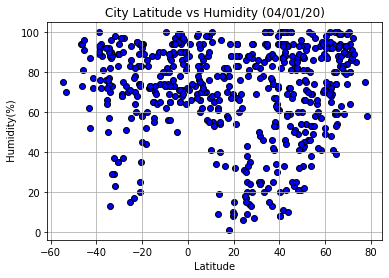

In [18]:
fig, ax = plt.subplots(figsize=(6, 4))
plt.scatter(weather_df['Lat'], weather_df['Humidity'], marker = 'o',color = 'blue', edgecolor='black')


# Incorporate the other graph properties
plt.title("City Latitude vs Humidity (04/01/20)")
plt.ylabel(" Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the image as .pngs

plt.savefig('output_data/latitude vs humidity.png')

# Show plot
plt.show()



## Latitude vs. Cloudiness Plot

* The relationship between latitude and cloudiness across the entire range of the variable plotted. 
* There is no obvious pattern to make an assumption between the variables. 

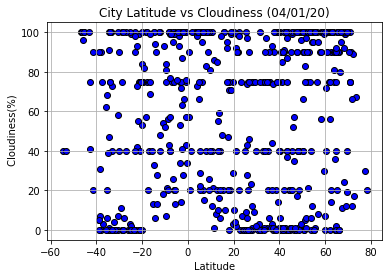

In [20]:
fig, ax = plt.subplots(figsize=(6, 4))
plt.scatter(weather_df['Lat'], weather_df['Cloudlness'], marker = 'o', color = 'blue', edgecolor='black')


# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness (04/01/20)")
plt.ylabel(" Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the image as .pngs

plt.savefig('output_data/latitude vs cloudiness.png')

# Show plot
plt.show()



## Latitude vs. Wind Speed Plot

* The relationship between latitude and wind speed across the entire range of the variable plotted. 
* There is no obvious pattern to make an assumption between the variables. 

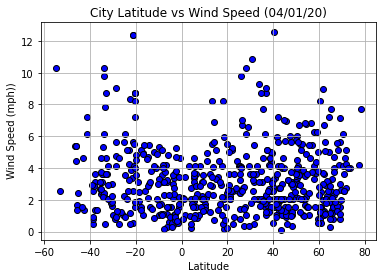

In [21]:
fig, ax = plt.subplots(figsize=(6, 4))
plt.scatter(weather_df['Lat'], weather_df['Wind Speed'], marker = 'o',color = 'blue', edgecolor='black')


# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed (04/01/20)")
plt.ylabel(" Wind Speed (mph))")
plt.xlabel("Latitude")
plt.grid(True)

# Save the image as .pngs

plt.savefig('output_data/latitude vs wind speed.png')

# Show plot
plt.show()


## Linear Regression

In [23]:
n_hemisphere = weather_df.loc[weather_df['Lat'] >= 0]
s_hemisphere = weather_df.loc[weather_df['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

* The plot shows that there are stronger negative relationship between Northern Hemisphere max temp and latitude. 
* r-squared is 77.93 % indicate variables which can be considered highly coorelated and stronger fit. 


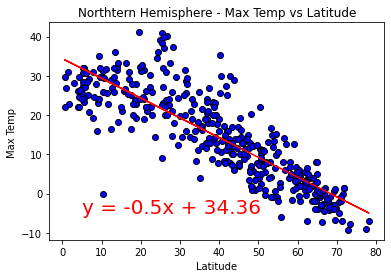

In [25]:
x = n_hemisphere['Lat']
y = n_hemisphere['Max Temp']

fig, ax = plt.subplots(figsize=(6, 4))
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y )

regress_values = x * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y, marker = 'o',color = 'blue', edgecolor='black')
plt.plot(x,regress_values, '-r')

# Incorporate the other graph properties
plt.annotate(line_eq,xy=(0,0),fontsize=20, color="red", xytext = (5,-5))
plt.title("Northtern Hemisphere - Max Temp vs Latitude")
plt.ylabel("Max Temp ")
plt.xlabel("Latitude")

# Save the image as .pngs

plt.savefig('output_data/liner_N_lat vs temp.png')

# Show plot
plt.show()

In [26]:
# Print out the r-squared value along with the plot.

print(f"The r-squared is: {rvalue**2}")

The r-squared is: 0.7271701267421031


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

* The plot shows that there are negative relationship between Southern Hemisphere max temp and latitude. 
* r-squared is 47.23 % is lower than midpoint that is not stronger fit.

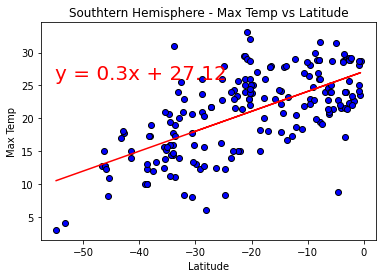

In [27]:
x = s_hemisphere['Lat']
y = s_hemisphere['Max Temp']

fig, ax = plt.subplots(figsize=(6, 4))
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y )

regress_values = x * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y, marker = 'o',color = 'blue', edgecolor='black')
plt.plot(x,regress_values , '-r')

# Incorporate the other graph properties
plt.annotate(line_eq, xy = (-55,26),fontsize=20, color="red")
plt.title("Southtern Hemisphere - Max Temp vs Latitude")
plt.ylabel("Max Temp")
plt.xlabel("Latitude")

# Save the image as .pngs

plt.savefig('output_data/liner_S_lat vs temp.png')


# Show plot
plt.show()

In [28]:
# Print out the r-squared value along with the plot.

print(f"The r-squared is: {rvalue**2}")

The r-squared is: 0.4279880895119689


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

* The r-squared is 4.74 % is not stronger fit. 
* The relationship between latitude and humidity across the entire range of the variable plotted. 
* There is no obvious pattern to make an assumption between the variables. 

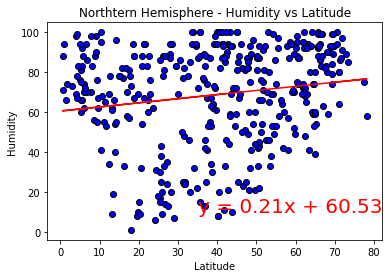

In [29]:
x = n_hemisphere['Lat']
y = n_hemisphere['Humidity']

fig, ax = plt.subplots(figsize=(6, 4))
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y )

regress_values = x * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y, marker = 'o',color = 'blue', edgecolor='black')
plt.plot(x,regress_values, '-r')

# Incorporate the other graph properties
plt.annotate(line_eq,xy = (35,10),fontsize=20, color="red", )
plt.title("Northtern Hemisphere - Humidity vs Latitude")
plt.ylabel("Humidity")
plt.xlabel("Latitude")

# Save the image as .pngs

plt.savefig('output_data/liner_N_lat vs humidity.png')


# Show plot
plt.show()

In [30]:
# Print out the r-squared value along with the plot.

print(f"The r-squared is: {rvalue**2}")

The r-squared is: 0.027240121003914822


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

* The r-squared is 4.74 % is not stronger fit. 
* The relationship between latitude and humidity across the entire range of the variable plotted. 
* There is no obvious pattern to make an assumption between the variables. 

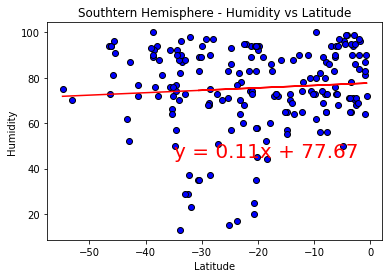

In [31]:
x = s_hemisphere['Lat']
y = s_hemisphere['Humidity']

fig, ax = plt.subplots(figsize=(6, 4))
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y )

regress_values = x * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y, marker = 'o',color = 'blue', edgecolor='black')
plt.plot(x,regress_values, '-r')

# Incorporate the other graph properties
plt.annotate(line_eq,(-35,45),fontsize=20, color="red", )
plt.title("Southtern Hemisphere - Humidity vs Latitude")
plt.ylabel("Humidity")
plt.xlabel("Latitude")

# Save the image as .pngs

plt.savefig('output_data/liner_S_lat vs humidity.png')


# Show plot
plt.show()

In [32]:
# Print out the r-squared value along with the plot.

print(f"The r-squared is: {rvalue**2}")

The r-squared is: 0.006112585931983117


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

* The r-squared is 2.61 % is not stronger fit. 
* The relationship between latitude and humidity across the entire range of the variable plotted. 
* There is no obvious pattern to make an assumption between the variables. 

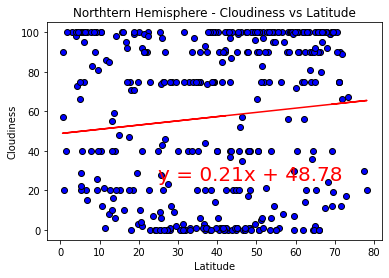

In [36]:
x = n_hemisphere['Lat']
y = n_hemisphere['Cloudlness']

fig, ax = plt.subplots(figsize=(6, 4))
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y )

regress_values = x * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y, marker = 'o',color = 'blue', edgecolor='black')
plt.plot(x,regress_values, '-r')

# Incorporate the other graph properties
plt.annotate(line_eq,(25,25),fontsize=20, color="red", )
plt.title("Northtern Hemisphere - Cloudiness vs Latitude")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")

# Save the image as .pngs

plt.savefig('output_data/liner_N_lat vs cloudiness.png')



# Show plot
plt.show()

In [37]:
# Print out the r-squared value along with the plot.

print(f"The r-squared is: {rvalue**2}")

The r-squared is: 0.011506296351143296


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

* The r-squared is below zero not stronger fit. 
* The relationship between latitude and humidity across the entire range of the variable plotted. 
* There is no obvious pattern to show the relationship between two variables. 

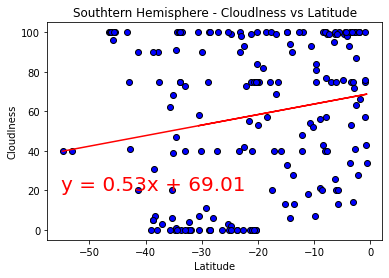

In [38]:
x = s_hemisphere['Lat']
y = s_hemisphere['Cloudlness']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y )

regress_values = x * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y, marker = 'o',color = 'blue', edgecolor='black')
plt.plot(x,regress_values, '-r')

# Incorporate the other graph properties
plt.annotate(line_eq,(-55,20),fontsize=20, color="red", )
plt.title("Southtern Hemisphere - Cloudlness vs Latitude")
plt.ylabel("Cloudlness")
plt.xlabel("Latitude")

# Save the image as .pngs

plt.savefig('output_data/liner_S_lat vs cloudiness.png')



# Show plot
plt.show()

In [39]:
# Print out the r-squared value along with the plot.

print(f"The r-squared is: {rvalue**2}")

The r-squared is: 0.03600448259227999


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

* The r-squared is 0.80 % not stronger fit. 
* There is no obvious pattern to show the relationship between two variables. 

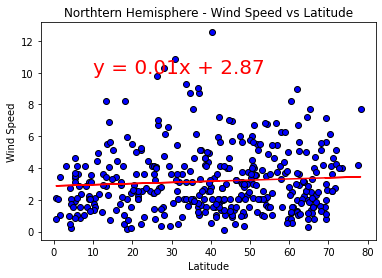

In [42]:
x = n_hemisphere['Lat']
y = n_hemisphere['Wind Speed']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y )

regress_values = x * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y, marker = 'o',color = 'blue', edgecolor='black')
plt.plot(x,regress_values, '-r')

# Incorporate the other graph properties
plt.annotate(line_eq,(10,10),fontsize=20, color="red", )
plt.title("Northtern Hemisphere - Wind Speed vs Latitude")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")

# Save the image as .pngs

plt.savefig('output_data/liner_N_lat vs wind.png')



# Show plot
plt.show()

In [43]:
# Print out the r-squared value along with the plot.

print(f"The r-squared is: {rvalue**2}")

The r-squared is: 0.005213103164756589


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

* The r-squared is 6.89% not stronger fit. 
* There is no obvious pattern to show the relationship between two variables. 

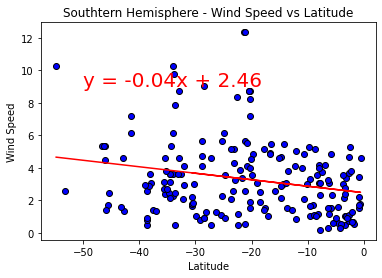

In [44]:
x = s_hemisphere['Lat']
y = s_hemisphere['Wind Speed']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y )

regress_values = x * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y, marker = 'o',color = 'blue', edgecolor='black')
plt.plot(x,regress_values, '-r')

# Incorporate the other graph properties
plt.annotate(line_eq,(-50,9),fontsize=20, color="red", )
plt.title("Southtern Hemisphere - Wind Speed vs Latitude")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")

# Save the image as .pngs

plt.savefig('output_data/liner_S_lat vs wind.png')



# Show plot
plt.show()

In [45]:
# Print out the r-squared value along with the plot.

print(f"The r-squared is: {rvalue**2}")

The r-squared is: 0.052686505438104554
